**Install dependencies**

In [1]:
# %%capture
# !pip install -U torch torchvision torchaudio torcheval
# !pip install numpy pandas pillow
# !pip install -U cjm_pil_utils

**Import dependencies**

In [2]:
# Import necessary modules from the standard library
from pathlib import Path  # For working with file paths
import random

from PIL import Image  # For working with images

import numpy as np  # For working with arrays

import torch  # PyTorch module for deep learning
from torchvision import transforms  # PyTorch module for image transformations

# Import pandas module for data manipulation
import pandas as pd

# Set options for Pandas DataFrame display
pd.set_option('max_colwidth', None)  # Do not truncate the contents of cells in the DataFrame
pd.set_option('display.max_rows', None)  # Display all rows in the DataFrame
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame

In [3]:
from cjm_pil_utils.core import get_img_files, resize_img

In [4]:
dataset_path = Path(f"/mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/")
# dataset_path = Path(f"/mnt/980_1TB_2/Datasets/pexels-110k-768p-min-jpg/")

In [5]:
# Set the path for the images directory
img_dir = Path(dataset_path/"images/")

In [6]:
# Get a list of the paths to the images in the images directory
img_paths = get_img_files(img_dir)

# Print the number of images in the images directory
print(len(img_paths))

109971


In [7]:
# Create a dictionary mapping image IDs to image paths
img_path_dict = {int(path.stem.split('-')[-1]) : path for path in img_paths}

# Display the first few entries in the dictionary using a Pandas Dataframe
pd.DataFrame.from_dict(img_path_dict, orient='index').head()

0
1061142                         /mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/images/1-art-background-1061142.jpg
2586334  /mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/images/1-person-beauty-face-blurred-background-2586334.jpg
1460032                     /mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/images/1-wtc-artist-concert-1460032.jpg
1061133                          /mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/images/10-art-artistic-1061133.jpg
1339845                             /mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/images/10-art-color-1339845.jpg

In [8]:
img_ids = list(img_path_dict.keys())

ID: 634658


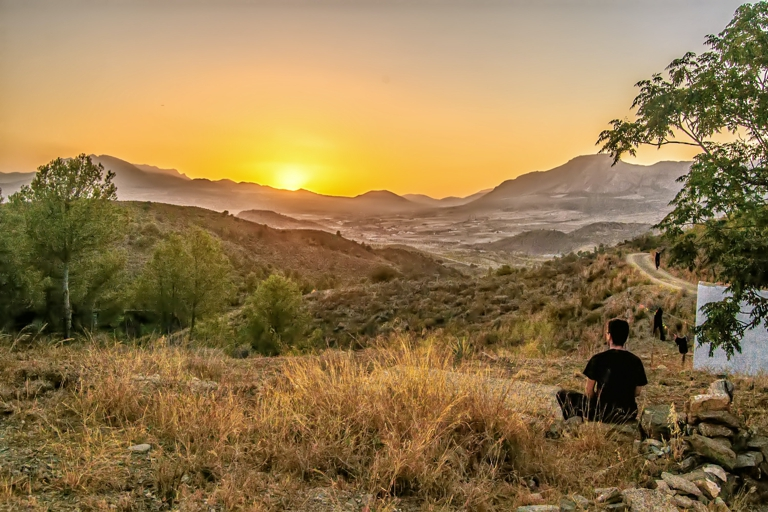

In [9]:
# Choose a random image ID from the list of image IDs
img_id = random.choice(img_ids)

print(f"ID: {img_id}")

# Open the image located at the path in the img_path_dict with the key of the current img_id
img_path = img_path_dict[img_id]
sample_img = Image.open(img_path)

sample_img

In [10]:
def pixel_swap(image_tensor, percentage=0.5):

    tensor_mask = torch.rand(image_tensor.shape[1:]).unsqueeze(0)

    # Find the indices of the pixels where the mask is greater than 0.2
    mask_indices = (tensor_mask < percentage).nonzero()

    # Get the pixel values at the mask indices
    masked_pixels = image_tensor[:, mask_indices[:, 1], mask_indices[:, 2]]

    # Shuffle the pixel values
    shuffled_pixels = masked_pixels[:, torch.randperm(masked_pixels.size(1))]

    # Replace the pixel values in the image with the shuffled pixel values
    image_tensor[:, mask_indices[:, 1], mask_indices[:, 2]] = shuffled_pixels

    return image_tensor

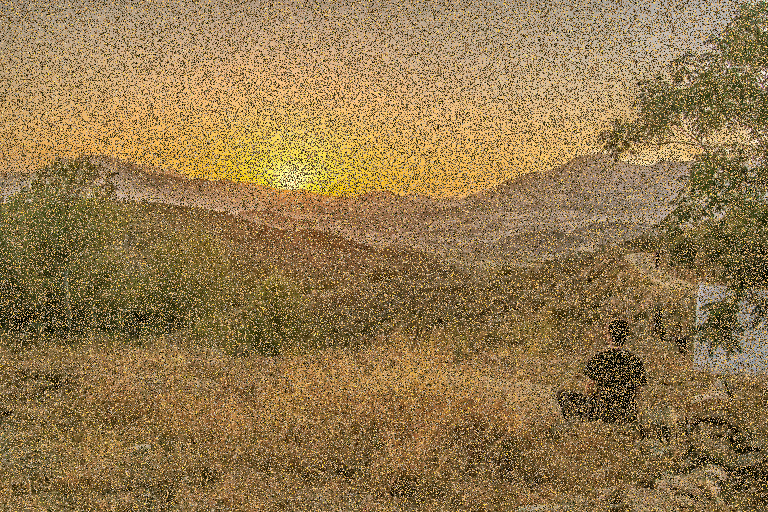

In [11]:
image_tensor = transforms.ToTensor()(sample_img)
pixel_swap(image_tensor)
transforms.ToPILImage()(image_tensor)

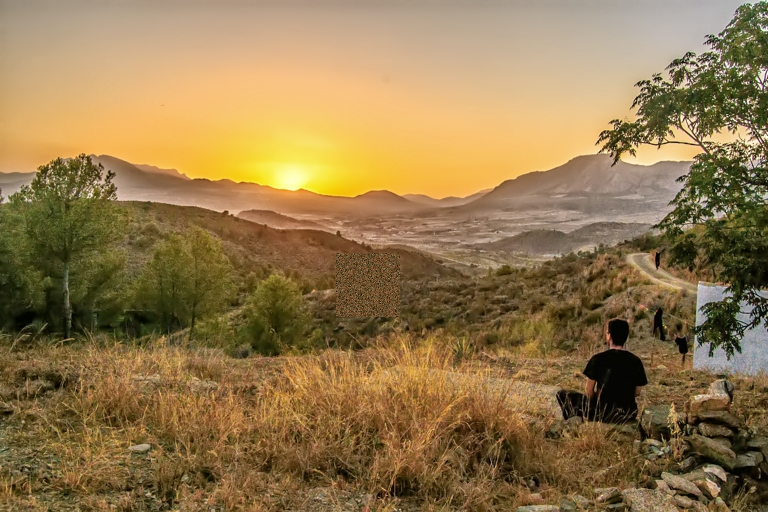

In [12]:
image_tensor = transforms.ToTensor()(sample_img)

# Define the patch size
patch_size = (64, 64)

# Select a random pixel-wise index
max_h = image_tensor.shape[1]-patch_size[0]
max_w = image_tensor.shape[2]-patch_size[1]
index = (torch.randint(patch_size[0], max_h, (1,)), torch.randint(patch_size[1], max_w, (1,)))

# Create a mask with the patch centered at the index
mask = torch.zeros(image_tensor.shape[1:])
mask[index[0] - patch_size[0] // 2:index[0] + patch_size[0] // 2,
     index[1] - patch_size[1] // 2:index[1] + patch_size[1] // 2] = 1

# 
inp_shape = (3, *patch_size)
image_tensor[:, mask == 1] = pixel_swap(image_tensor[:, mask == 1].reshape(inp_shape), 0.95).reshape((3, -1))


transforms.ToPILImage()(image_tensor)

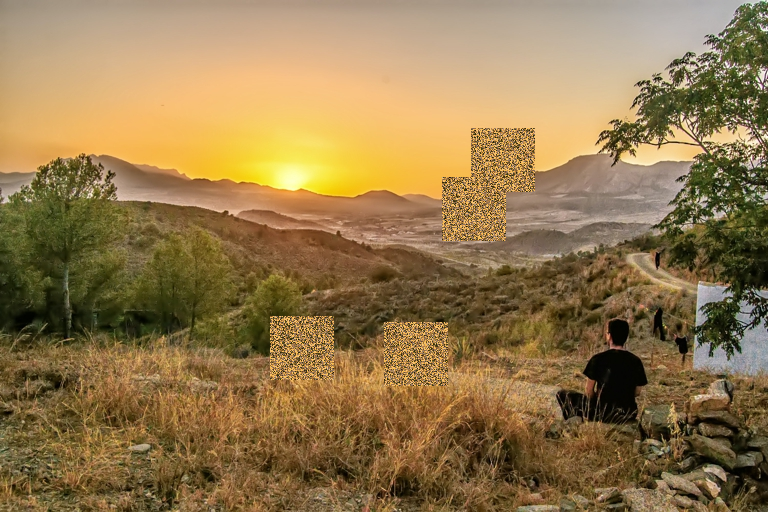

In [13]:
image_tensor = transforms.ToTensor()(sample_img)

# Define the patch size
patch_size = (64, 64)

num_patches = 4

# Select a random pixel-wise index
max_h = image_tensor.shape[1]-patch_size[0]
max_w = image_tensor.shape[2]-patch_size[1]
indices = [(torch.randint(patch_size[0], max_h, (1,)), torch.randint(patch_size[1], max_w, (1,))) for _ in range(num_patches)]

# Create a mask with the patch centered at the index
mask = torch.zeros(image_tensor.shape[1:])

for index in indices:
    mask[index[0] - patch_size[0] // 2:index[0] + patch_size[0] // 2,
         index[1] - patch_size[1] // 2:index[1] + patch_size[1] // 2] = 1

# 
image_tensor[:, mask == 1] = pixel_swap(image_tensor[:, mask == 1].unsqueeze(dim=1), 0.95).reshape((3, -1))


transforms.ToPILImage()(image_tensor)